In [1]:
'''
conda create -n mne python=3.10
'''

'\nconda create -n mne python=3.10\n'

In [2]:
# !pip install mne
# !pip install numpy
# !pip install pandas
# !pip install nose

In [3]:
import sys
path_utils = 'decoding_toolbox_py/helper_funcs' 
sys.path.append(path_utils)

In [4]:
import os, glob, platform
import numpy as np
import numpy.matlib
import pickle
import pandas as pd
import pathlib
import matplotlib
import matplotlib.pyplot as plt

import mne
mne.__version__


'1.4.0'

In [5]:
subjs_list = ['s01'
              , 's02'
              , 's03'
              ,'s04','s05','s07','s08','s09','s10','s11','s12','s13','s14', 's15', 's16','s17','s18','s19','s20','s21','s22','s23','s24','s25','s26','s27' 
              ]

In [6]:
path = 'Cond_CJ_EEG'

# Main

In [7]:
epochs = []
for isubj, subject_id in enumerate(subjs_list):
    preproc_path = os.path.join(path, subject_id);
    epoch = mne.read_epochs(preproc_path + '/main_epo.fif',verbose=False)
    epochs.append(epoch.average());
    # print(isubj)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

In [8]:
# epoch.average()

In [9]:
gvaverage = mne.grand_average(epochs[:])

Identifying common channels ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pi

In [10]:
type(gvaverage)
'''
Evoked is basically the same as the epocs data but averaged(?)
'''

'\nEvoked is basically the same as the epocs data but averaged(?)\n'

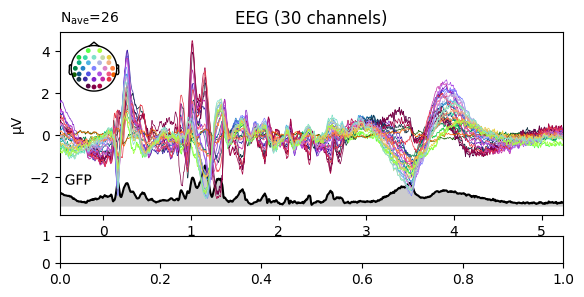

In [11]:
# figsize unit is inches
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6.5, 3.),
                         gridspec_kw=dict(height_ratios=[5, 0.75]))

# we'll put the evoked plot in the upper axes, and the brain below
evoked_idx = 0
brain_idx = 1

# plot the evoked in the desired subplot, and add a line at peak activation
gvaverage.plot(axes=axes[evoked_idx], spatial_colors=True,  gfp=True) #  spatial_colors=True, gfp=True
axes[evoked_idx].axvline(0, color='#66CCEE', ls='--')
axes[evoked_idx].axvline(0.75+(0.25*7), color='red', ls='--')
axes[evoked_idx].axvline(0.75, color='red', ls='--')
for istim in range(6):
    axes[evoked_idx].axvline(0.75+0.25*(istim+1), color='green', ls='--')



In [12]:
all_epochs = []
all_rawdata = [None] * np.size(subjs_list)
for isubj, subject_id in enumerate(subjs_list):
    preproc_path = os.path.join(path, subject_id);
    epoch = mne.read_epochs(preproc_path + '/main_epo.fif',verbose=False)
    subj_data = {'epoch_dat' : epoch.get_data(), 'metadata' :  epoch.metadata}
    all_rawdata[isubj] =  subj_data
    all_epochs.append(epoch);
    epoch.metadata

In [13]:
nreps = [0, 1, 2];
all_evoks = []

for irep in nreps:
    nreplist = []
    for isubj, subject_id in enumerate(subjs_list):
        epoch = all_epochs[isubj]
        mdata = epoch.metadata.copy()
        mdata.reset_index(inplace = True)
        sel_epos = mdata[mdata.nrep == irep].index;  
        nreplist.append(epoch[sel_epos].average());
        #all_evoks[irep] = epoch[sel_epos].average();
    all_evoks.append(nreplist)      
        

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

In [14]:
nreps = [0, 1, 2];
rep_gvaverage = [None] * 3
for irep in nreps:
   rep_gvaverage[irep] = mne.grand_average(all_evoks[irep])
    

Identifying common channels ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pi

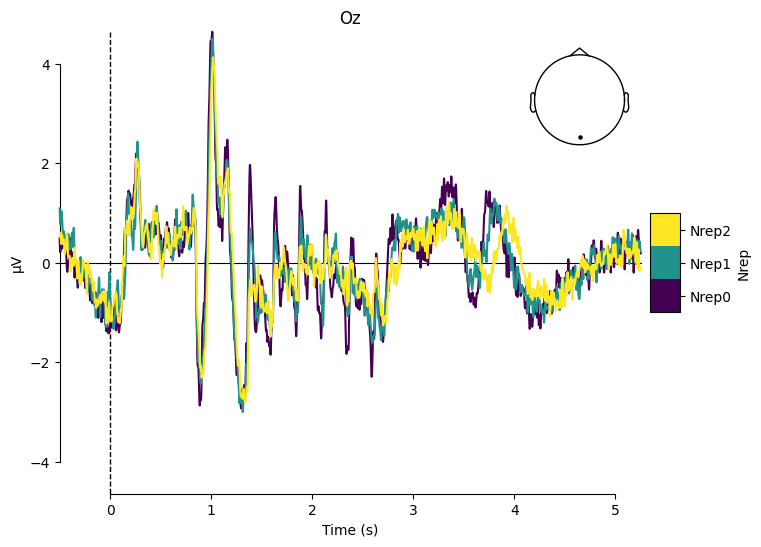

[<Figure size 800x600 with 3 Axes>]

In [15]:
mne.viz.plot_compare_evokeds(dict(Nrep0=rep_gvaverage[0], Nrep1=rep_gvaverage[1],Nrep2=rep_gvaverage[2]), picks = ['Oz'], cmap=('Nrep', 'viridis'))


In [16]:
all_rawdata

[{'epoch_dat': array([[[-3.23375903e-06, -3.39563272e-06, -3.27639832e-06, ...,
           -5.21956107e-06, -6.31544108e-06, -6.69954908e-06],
          [-4.18014139e-06, -4.11404623e-06, -3.79929812e-06, ...,
           -1.24822620e-06, -4.05309999e-07,  1.77226118e-07],
          [-5.28073368e-06, -6.15140389e-06, -6.04043680e-06, ...,
           -4.85000171e-06, -7.06356451e-06, -8.74862539e-06],
          ...,
          [-2.71091034e-06, -3.28615356e-06, -3.88736486e-06, ...,
           -3.63481018e-06, -5.15470027e-06, -6.44033653e-06],
          [-2.59290086e-06, -2.89545555e-06, -2.98459386e-06, ...,
           -3.85033314e-06, -5.06823715e-06, -5.84343370e-06],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
  
         [[-7.61577053e-08, -6.68683434e-07, -1.40924851e-06, ...,
            3.06527659e-06,  2.51745845e-06,  2.13269617e-06],
          [ 2.48171713e-06,  2.76323339e-06,  2.75248207e-

In [17]:
!pip install scikit-learn

In [18]:
# Scorer: non parametric R²
from sklearn.metrics import roc_auc_score

def prob_scorer(y_true, y_pred):
    """Score probabilistic outputs for a single class as the other class is the numerical complement."""
    return roc_auc_score(y_true, y_pred)

In [19]:
time = gvaverage.times

In [20]:
time.shape

(2876,)

In [21]:
len(time)

2876

In [22]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np

# from decoding_toolbox_py.Helper_funcs import DecToolbox as dt
# from decoding_toolbox_py.Helper_funcs.base_stats import corr_linear_circular
# from decoding_toolbox_py.Helper_funcs.classifier_funcs import scorer_angle, AngularRegression

import DecToolbox as dt
from base_stats import corr_linear_circular
from classifier_funcs import scorer_angle, AngularClassifier



# import DecToolbox as dt # pip install dectool 

from mne import read_epochs
from mne.decoding import SlidingEstimator,GeneralizingEstimator

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVR, SVC
# from base_stats import corr_linear_circular
from sklearn import preprocessing
# from classifier_funcs import AngularRegression, scorer_angle
import time as tm
from sklearn.model_selection import KFold


time = gvaverage.times
n_time = len(time)
n_time = 2
#%%capture --no-display
clf = SVC(kernel='linear')
clf = SVC(kernel='linear', probability=True)
a = tm.time() 
nfold = 5 # folds for crossvalidations

nSubj = np.size(subjs_list)
scorer_deci_subjs = np.zeros((nSubj,n_time))
scorer_deci_fold_subjs = np.zeros((nfold,n_time))
lab = preprocessing.LabelEncoder()

for ival, isubj in enumerate(subjs_list):
    print(ival, isubj)
    Y = all_rawdata[ival]['epoch_dat'] 
    all_rawdata[ival]['metadata']['condv'] = 'C'
    all_rawdata[ival]['metadata'].loc[all_rawdata[ival]['metadata']['cond']== 1, 'condv'] =  'D'
    dv  = np.array(all_rawdata[ival]['metadata'].condv)
    dv = lab.fit_transform(dv)
    
    #dv = lab.fit_transform(dv)
   # binned_dv = np.digitize(dv, bins = np.array([ -0.3,0,0.3 ]) ) # bins collapsing degrees by similarity

    FoldsIdx = dt.CreateFolds(dv, Y, nfold)
    
    for ifold, fold in enumerate(FoldsIdx):
        train_ix = fold['train_index']
        test_ix = fold['test_index']
        print('hi')
        for it in range(n_time):
        # for it in range(10):
            Ytime = Y[:,:,it]
            scaler = StandardScaler().fit(Ytime)
            Ytime = scaler.transform(Ytime)
            
            clf.fit( Ytime[train_ix,:], dv[train_ix])
            preds = clf.predict(X = Ytime[test_ix])
            scorer_deci_fold_subjs[ifold, it] = prob_scorer(dv[test_ix],preds)
            
    scorer_deci_subjs[ival, : ] = np.mean(scorer_deci_fold_subjs, axis = 0)
b = tm.time()                          

0 s01
hi
hi
hi
hi
hi
1 s02
hi
hi
hi
hi
hi
2 s03
hi
hi
hi
hi
hi
3 s04
hi
hi
hi
hi
hi
4 s05
hi
hi
hi
hi
hi
5 s07
hi
hi
hi
hi
hi
6 s08
hi
hi
hi
hi
hi
7 s09
hi
hi
hi
hi
hi
8 s10
hi
hi
hi
hi
hi
9 s11
hi
hi
hi
hi
hi
10 s12
hi
hi
hi
hi
hi
11 s13
hi
hi
hi
hi
hi
12 s14
hi
hi
hi
hi
hi
13 s15
hi
hi
hi
hi
hi
14 s16
hi
hi
hi
hi
hi
15 s17
hi
hi
hi
hi
hi
16 s18
hi
hi
hi
hi
hi
17 s19
hi
hi
hi
hi
hi
18 s20
hi
hi
hi
hi
hi
19 s21
hi
hi
hi
hi
hi
20 s22
hi
hi
hi
hi
hi
21 s23
hi
hi
hi
hi
hi
22 s24
hi
hi
hi
hi
hi
23 s25
hi
hi
hi
hi
hi
24 s26
hi
hi
hi
hi
hi
25 s27
hi
hi
hi
hi
hi


In [23]:
# plt.plot(time[0:40], np.squeeze(np.mean(scorer_deci_subjs,axis = 0)))
#ax = plt.gca()
#ax.set_ylim([0.45, 0.55])

In [24]:
ival

25

# Stimuli epo

In [25]:
st_epochs = []
for isubj, subject_id in enumerate(subjs_list):
    preproc_path = os.path.join(path, subject_id);
    epoch = mne.read_epochs(preproc_path + '/mainstim_epo.fif',verbose=False)
    st_epochs.append(epoch.average());
    #print(isubj)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

In [26]:
st_gvaverage = mne.grand_average(st_epochs[:])

Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Identifying common channels ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_c

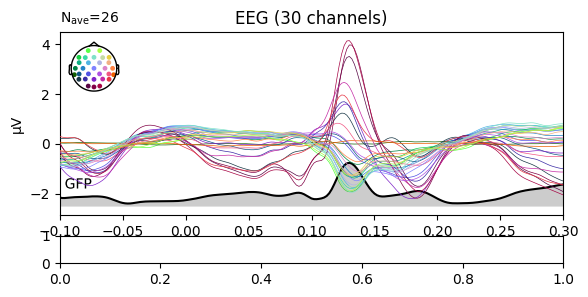

In [27]:
# figsize unit is inches
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6.5, 3.),
                         gridspec_kw=dict(height_ratios=[5, 0.75]))

# we'll put the evoked plot in the upper axes, and the brain below
evoked_idx = 0
brain_idx = 1

# plot the evoked in the desired subplot, and add a line at peak activation
st_gvaverage.plot(axes=axes[evoked_idx], spatial_colors=True,  gfp=True) #  spatial_colors=True, gfp=True
axes[evoked_idx].axvline(0, color='#66CCEE', ls='--')
axes[evoked_idx].axvline(0.75+(0.25*7), color='red', ls='--')
axes[evoked_idx].axvline(0.75, color='red', ls='--')
for istim in range(6):
    axes[evoked_idx].axvline(0.75+0.25*(istim+1), color='green', ls='--')


In [28]:
all_st_epochs = []
all_st_rawdata = [None] * np.size(subjs_list)
for isubj, subject_id in enumerate(subjs_list):
    preproc_path = os.path.join(path, subject_id);
    epoch = mne.read_epochs(preproc_path + '/mainstim_epo.fif',verbose=False)
    subj_data = {'epoch_dat' : epoch.get_data(), 'metadata' :  epoch.metadata}
    all_st_rawdata[isubj] =  subj_data
    all_st_epochs.append(epoch);
    epoch.metadata

In [29]:
nreps = [0, 1, 2];
all_st_evoks = []

for irep in nreps:
    nreplist = []
    for isubj, subject_id in enumerate(subjs_list):
        epoch = all_st_epochs[isubj]
        mdata = epoch.metadata.copy()
        mdata.reset_index(inplace = True)
        sel_epos = mdata[mdata.nrep == irep].index;  
        nreplist.append(epoch[sel_epos].average());
        #all_evoks[irep] = epoch[sel_epos].average();
    all_st_evoks.append(nreplist)      

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

In [30]:
nreps = [0, 1, 2];
st_rep_gvaverage = [None] * 3
for irep in nreps:
   st_rep_gvaverage[irep] = mne.grand_average(all_st_evoks[irep])
    

Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Identifying common channels ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_c

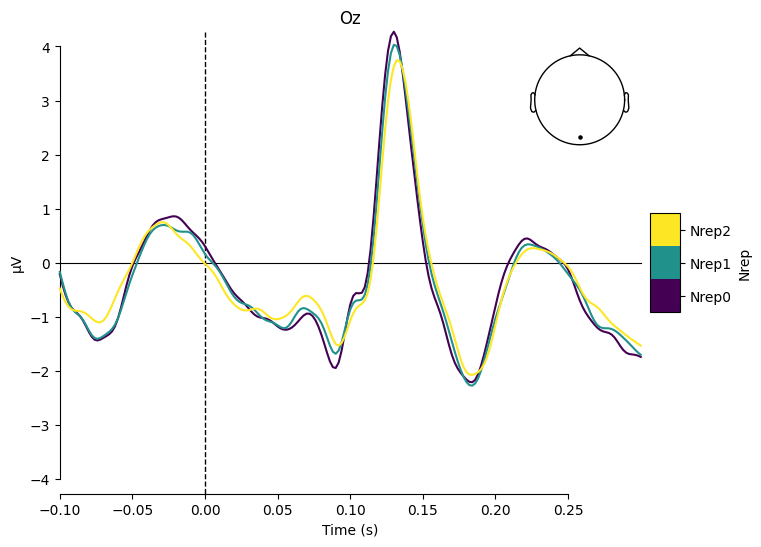

[<Figure size 800x600 with 3 Axes>]

In [31]:
mne.viz.plot_compare_evokeds(dict(Nrep0=st_rep_gvaverage[0], Nrep1=st_rep_gvaverage[1],Nrep2=st_rep_gvaverage[2]), picks = ['Oz'], cmap=('Nrep', 'viridis'))


# Decoding

In [32]:
!pwd

/Users/junjieji/Desktop/master-thesis


In [33]:
import DecToolbox as dt

In [34]:
from base_stats import corr_linear_circular

def circ_corr_fun(Y, X):
    # Y is a matrix with trials x channels x timepoints
    # X is a vector with the orientation of each stimulus in radians
    n_trial, n_chan, n_time = Y.shape
    Yreshape = Y.reshape([-1, n_chan * n_time])
    # linear circular correlation between MEG and stim angle
    _, R2, _ = corr_linear_circular(Yreshape, X)
    R2 = R2.reshape([n_chan, n_time])
    return R2


# Circular correlation

In [35]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np

from mne import read_epochs
from mne.decoding import SlidingEstimator,GeneralizingEstimator

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVR, SVC
from base_stats import corr_linear_circular

#from jr.gat import subscore
#from jr.gat import AngularRegression, scorer_angle
#from jr.stats import corr_linear_circular
#from jr.plot import pretty_gat, pretty_decod

In [36]:
Y.shape

(256, 32, 2876)

In [37]:
Y = all_st_rawdata[0]['epoch_dat']
X = np.array(all_st_rawdata[0]['metadata'].orient)
phi = X

In [38]:
Y.shape

(1563, 32, 201)

In [39]:
n_trial, n_chan, n_time = Y.shape

In [40]:
nSubj = np.size(subjs_list)
R_subjs = np.zeros((nSubj,n_time))
Rch_subjs = np.zeros((nSubj,n_chan, n_time))

for ival, isubj in enumerate(subjs_list):
    R2 = circ_corr_fun(all_st_rawdata[ival]['epoch_dat'], np.deg2rad(all_st_rawdata[ival]['metadata'].orient))
    R_subjs[ival, :] = np.squeeze(np.mean(R2,0))
    Rch_subjs[ival, :, :] = R2


/Users/junjieji/Desktop/master-thesis/base_stats.py:184: RuntimeWarning: invalid value encountered in divide
  R = (np.dot(y.T, X) / float(len(y) - 1)) / (y_sd * X_sd)


In [41]:
evoked = st_gvaverage.copy()

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


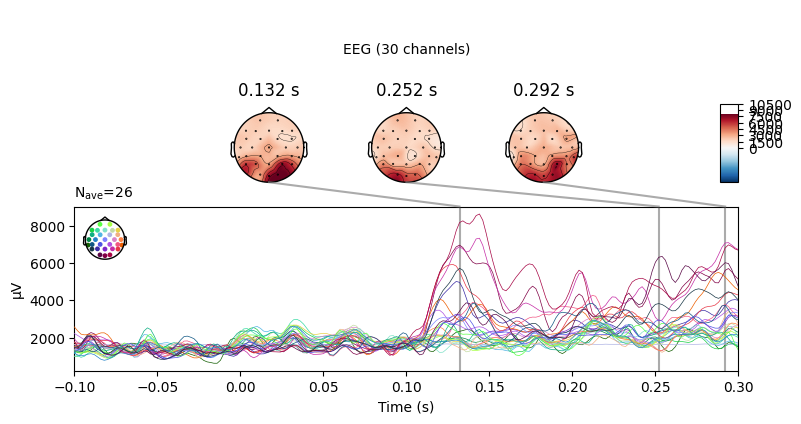

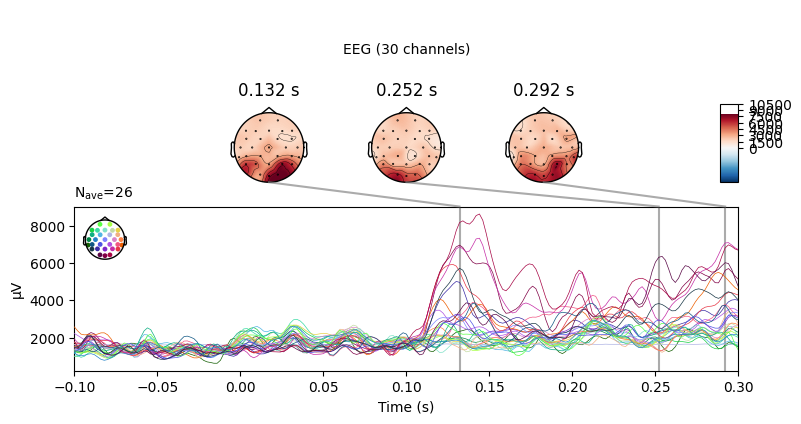

In [42]:
evoked.data = np.mean(Rch_subjs,axis = 0)
evoked.plot_joint()

In [43]:
#plt.plot(time, np.squeeze(np.mean(R_subjs,axis = 0)))

# Multivariate Circular Correlation